# references

http://scikit-image.org/docs/dev/auto_examples/edges/plot_contours.html

https://stackoverflow.com/questions/21104664/extract-all-bounding-boxes-using-opencv-python

http://scikit-image.org/docs/0.12.x/auto_examples/segmentation/plot_label.html

    

In [4]:
%matplotlib inline 
from __future__ import division
from pylab import *
import skimage as ski
from skimage import data, io, filters, exposure, measure
from skimage.filters import rank
from skimage import img_as_float, img_as_ubyte
from skimage.morphology import disk
import skimage.morphology as mp
from skimage import util
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray, gray2rgb
from skimage.filters.edges import convolve
from matplotlib import pylab as plt
import numpy as np
from numpy import array
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from ipywidgets import *
from ipykernel.pylab.backend_inline import flush_figures
from multiprocessing.pool import ThreadPool
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
dicesToRead = [
    '01', '02', '03','04','05',
   '06','07','08', '09', '10',
   '11', '12','13','14','15',
   '16','17', '18', '19', '20',
   '21'
]
# dicesToRead = ['08']
def drawDiceImage(i, img):
    plt.subplot(6,3,i)
    plt.imshow(img)

In [5]:
dices = [io.imread('./dices/dice{0}.jpg'.format(i)) for i in dicesToRead]

In [6]:
def getEdges(img, gamma = 0.7, sig=3, l=0, u=100): #gama 0.7 sig = 4.65
    img = rgb2gray(img)
    pp,pk = np.percentile(img,(l,u))
    img = exposure.rescale_intensity(img,in_range=(pp,pk))
    from skimage import feature
    img = img ** gamma
    img = ski.feature.canny(img, sigma=sig)
    return img

In [48]:
def getEdges(img, gamma = 0.7, sig=3, l=0, u=100): #gama 0.7 sig = 4.65 ##TEST ONLY
    img = rgb2gray(img)
    img = ski.feature.canny(img, sigma=sig)
    return img

In [49]:
def findCircles(image, edges):
    # Detect two radii
    hough_radii = np.arange(5, 15, 4)
    hough_res = hough_circle(edges, hough_radii)

    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                               total_num_peaks=10)

    # Draw them
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
    image = gray2rgb(image)
    for center_y, center_x, radius in zip(cy, cx, radii):
        circy, circx = circle_perimeter(center_y, center_x, radius)
        image[circy, circx] = (220, 20, 20)
    return image

<p>Failed to display Jupyter Widget of type <code>interactive</code>.</p>
<p>
  If you're reading this message in Jupyter Notebook or JupyterLab, it may mean
  that the widgets JavaScript is still loading. If this message persists, it
  likely means that the widgets JavaScript library is either not installed or
  not enabled. See the <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">Jupyter
  Widgets Documentation</a> for setup instructions.
</p>
<p>
  If you're reading this message in another notebook frontend (for example, a static
  rendering on GitHub or <a href="https://nbviewer.jupyter.org/">NBViewer</a>),
  it may mean that your frontend doesn't currently support widgets.
</p>

[]


[]
[]


[]


[]
[]


[]
[]


[]


C:\ProgramData\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)


C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_canny.py:183: RuntimeWarning: invalid value encountered in greater
  eroded_mask = eroded_mask & (magnitude > 0)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_canny.py:192: RuntimeWarning: invalid value encountered in greater_equal
  pts_plus = (isobel >= 0) & (jsobel >= 0) & (abs_isobel >= abs_jsobel)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_canny.py:193: RuntimeWarning: invalid value encountered in less_equal
  pts_minus = (isobel <= 0) & (jsobel <= 0) & (abs_isobel >= abs_jsobel)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_canny.py:193: RuntimeWarning: invalid value encountered in greater_equal
  pts_minus = (isobel <= 0) & (jsobel <= 0) & (abs_isobel >= abs_jsobel)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_canny.py:211: RuntimeWarning: invalid value encountered in greater_equal
  pts_plus = (isobel >= 0) & (jsobel >= 0) & (abs_isobel <= abs_jsobel)
C:\Progr

[]
[]


[]


[]


[]


[]
[]
[]


[]
[]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[]


[]


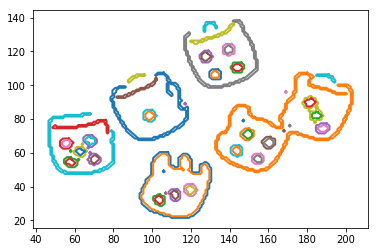

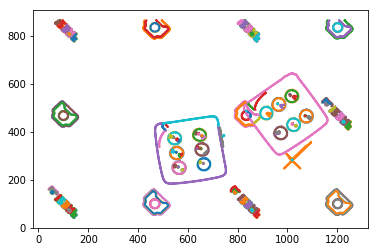

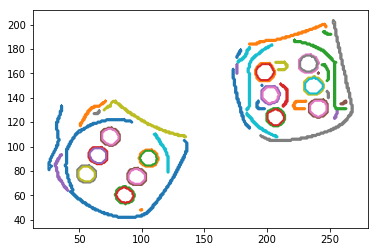

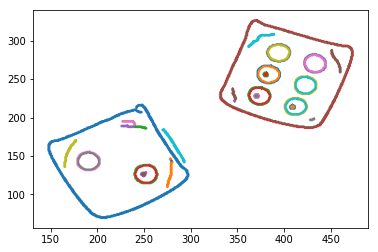

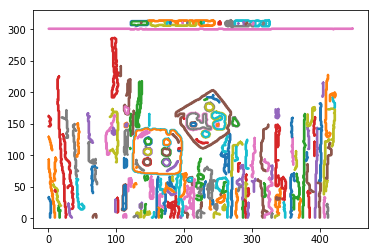

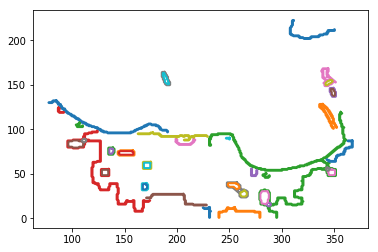

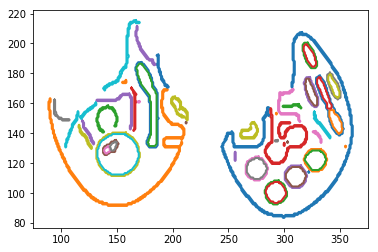

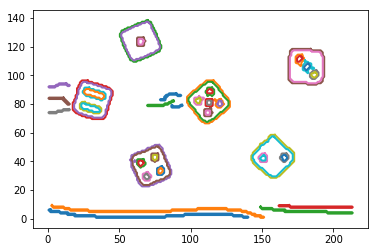

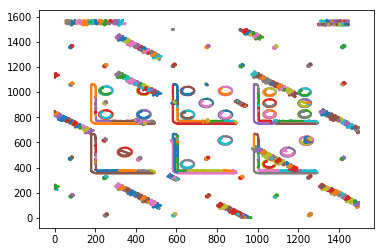

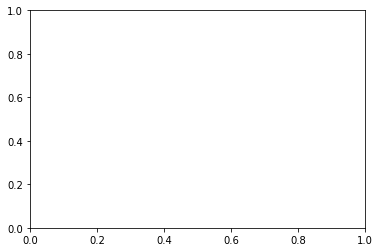

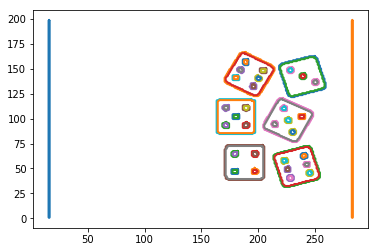

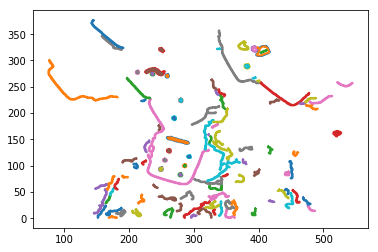

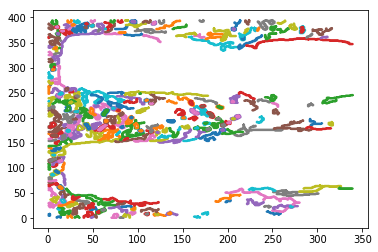

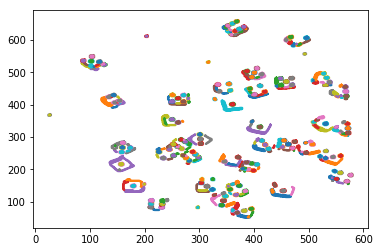

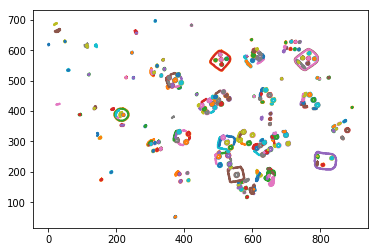

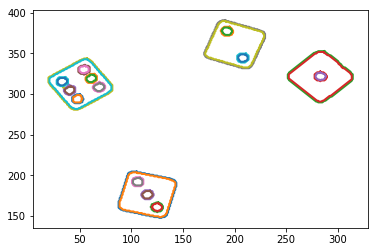

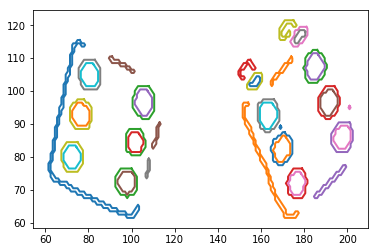

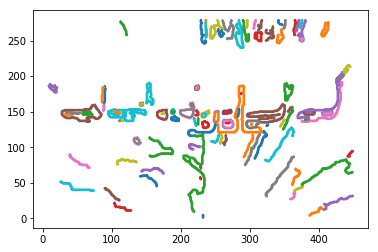

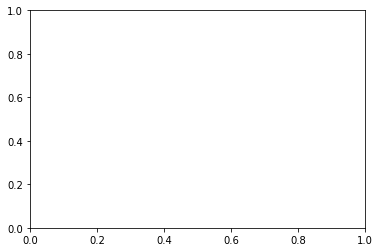

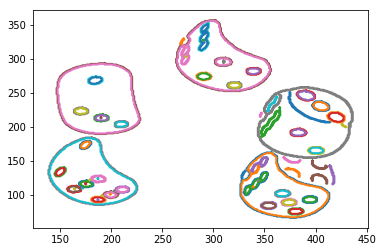

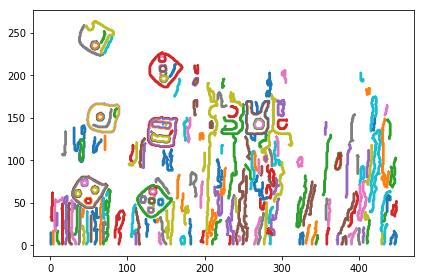

<function __main__.drawDices>

In [65]:
def drawDices(gamma=1.4, sig = 1.7, l=50, u=100):
    fig = plt.figure(facecolor="black", figsize=(60,60))
    i = 1
    for img in dices:
        edges = getEdges(img, gamma, sig, l, u)
        contours = measure.find_contours(edges, 0.5, fully_connected="high")
        fig, ax = plt.subplots()
#         ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
        values = []
        for n, contour in enumerate(contours):
#             region = regionprops(contour)
#             print(region)
#             if region.area > 50:
                
#             roi=im[y:y+h,x:x+w]
        
#             if h > 10 and w > 10:
#                 values.append([y, x, h, w])
            ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

#         ax.axis('image')
#         img = findCircles(img, edges)
#         drawDiceImage(i, edges)
        i +=1 
#         drawDiceImage(i, img)
        print(values)
    plt.tight_layout()
    plt.show()
    fig.savefig("dices.pdf",facecolor="black")
    plt.close()

interact(drawDices, gamma=(0.1,2,0.1), sig=(0.1,4,0.1), l=(0,100,1), u = (0,100,1))

In [10]:
def parse_image(gamma, img, l, sig, u):
    image = getEdges(img, gamma, sig, l, u)
    thresh = threshold_otsu(image)
    bw = closing(image > thresh, square(2))
    # remove artifacts connected to image border
    cleared = clear_border(bw)
    # label image regions
    label_image = label(cleared)
    image_label_overlay = label2rgb(label_image, image=image)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(img)
    values = []
    for region in regionprops(label_image):
        # take regions with large enough areas
        
        if region.area >= 70:
            miny, minx, maxy, maxx = region.bbox
            height = maxy - miny
            width = maxx - minx
            # draw rectangle around segmented coins
            rect = mpatches.Rectangle((minx, miny), width, height,
                                      fill=False, edgecolor='blue', linewidth=2)
            values.append({"minx": minx, "miny": miny, "maxx": maxx,
                           "maxy": maxy, "rect": rect, "area": region.area,
                           "width": width, "height": height})
        #                 ax.add_patch(rect)
    values = [x for x in values if 2 >= x["width"] / x["height"] >= 0.5]
    values.sort(key=lambda x: x['area'], reverse=True)
    if len(values) > 0:
        firstOk = values[0]
        i = 1
        filtered = [x for x in values if x['height'] >= firstOk['height'] / 2 and x['width'] >= firstOk['width'] / 2]
        print([x['area'] for x in filtered])
        for f in filtered:
            # ax.add_patch(f['rect'])
            ax.imshow(img[ f['miny']:f['maxy'], f['minx']:f['maxx']])
            # drawDiceImage(i, img[f['minx']:f['width'], f['miny']:f['height']])
            # print(f)
            # print(f['rect'])
            # drawDiceImage(i, f['rect'])
            i += 1
    return fig


<p>Failed to display Jupyter Widget of type <code>interactive</code>.</p>
<p>
  If you're reading this message in Jupyter Notebook or JupyterLab, it may mean
  that the widgets JavaScript is still loading. If this message persists, it
  likely means that the widgets JavaScript library is either not installed or
  not enabled. See the <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">Jupyter
  Widgets Documentation</a> for setup instructions.
</p>
<p>
  If you're reading this message in another notebook frontend (for example, a static
  rendering on GitHub or <a href="https://nbviewer.jupyter.org/">NBViewer</a>),
  it may mean that your frontend doesn't currently support widgets.
</p>

[154, 133, 119, 113, 113, 112]


[1154, 1028]
[357, 338]


[584, 531]
[526, 152]


[368]
[517, 419]
[122, 116, 113, 102, 91, 89]


[1747, 1678, 1665, 1615, 1550, 1513]


C:\ProgramData\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:297: RuntimeWarning: invalid value encountered in true_divide
  image = (image - imin) / float(imax - imin)


C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_canny.py:183: RuntimeWarning: invalid value encountered in greater
  eroded_mask = eroded_mask & (magnitude > 0)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_canny.py:192: RuntimeWarning: invalid value encountered in greater_equal
  pts_plus = (isobel >= 0) & (jsobel >= 0) & (abs_isobel >= abs_jsobel)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_canny.py:193: RuntimeWarning: invalid value encountered in less_equal
  pts_minus = (isobel <= 0) & (jsobel <= 0) & (abs_isobel >= abs_jsobel)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_canny.py:193: RuntimeWarning: invalid value encountered in greater_equal
  pts_minus = (isobel <= 0) & (jsobel <= 0) & (abs_isobel >= abs_jsobel)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\feature\_canny.py:211: RuntimeWarning: invalid value encountered in greater_equal
  pts_plus = (isobel >= 0) & (jsobel >= 0) & (abs_isobel <= abs_jsobel)
C:\Progr

error with 9
[149, 138, 137, 133, 127, 125]


[528, 176]
[317, 215, 196, 142, 141, 136, 134]


[305, 281, 277, 249, 232, 226, 220, 209, 198, 198, 190, 188, 169, 169, 168, 167, 163, 163, 160, 154, 152, 149, 139, 136, 132, 82]


[492, 437, 384, 302, 299, 262, 257, 243, 235, 227, 223, 218, 210, 208, 198, 190, 190, 189, 181, 181, 152, 139]
[233, 222, 205, 191, 187, 93]


[218, 191]
[433]
error with 18


[458, 406, 405, 331, 319]


[244, 170, 160, 150, 136, 127, 100]


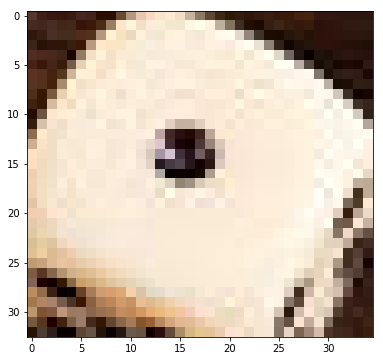

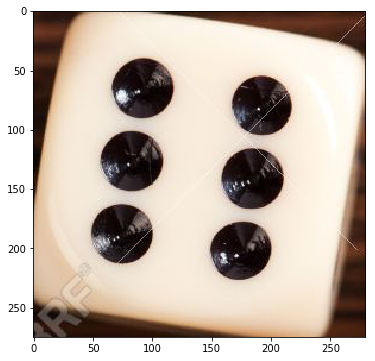

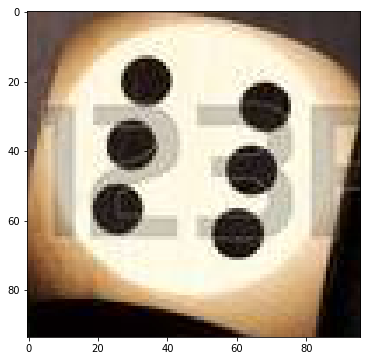

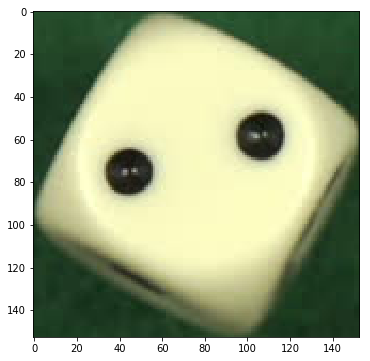

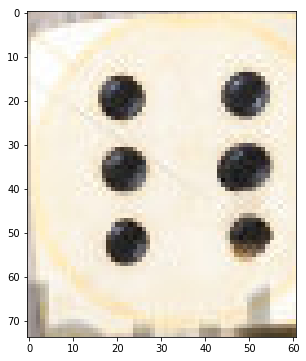

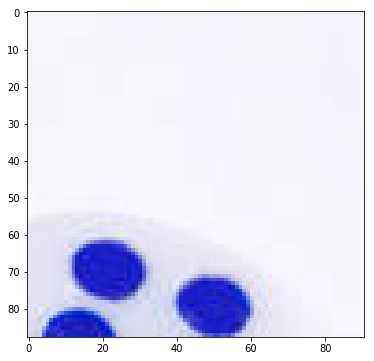

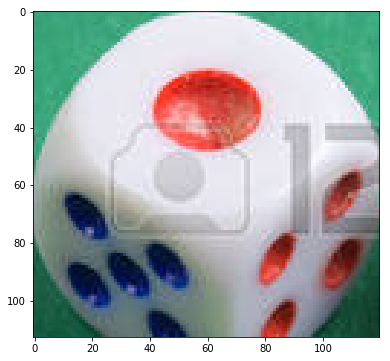

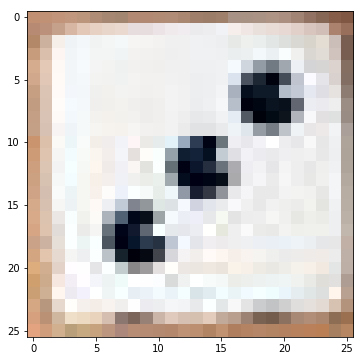

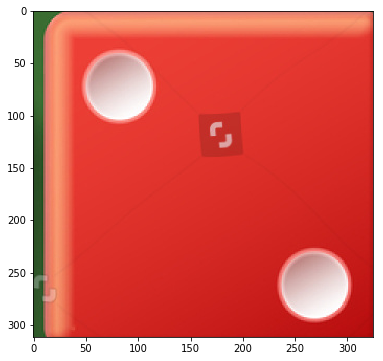

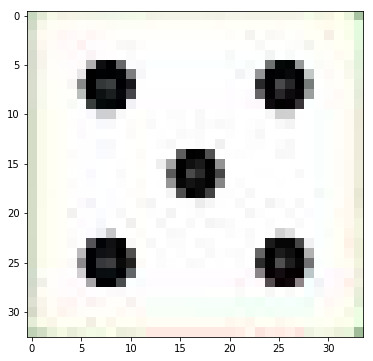

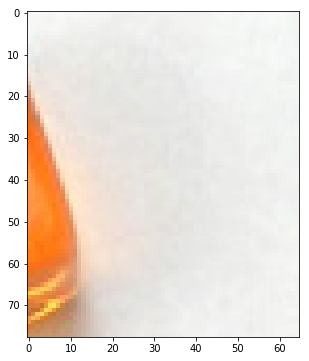

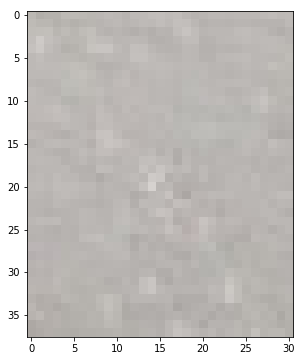

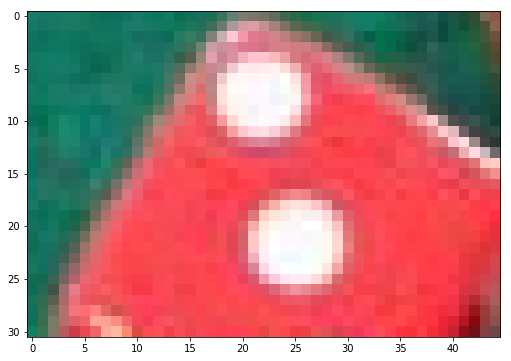

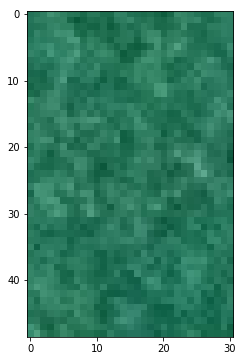

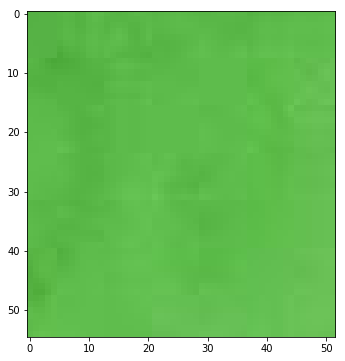

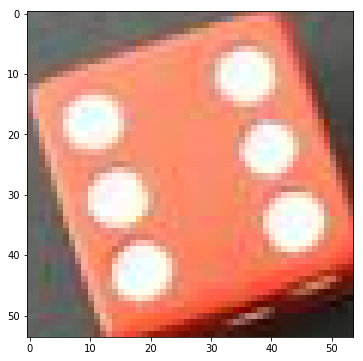

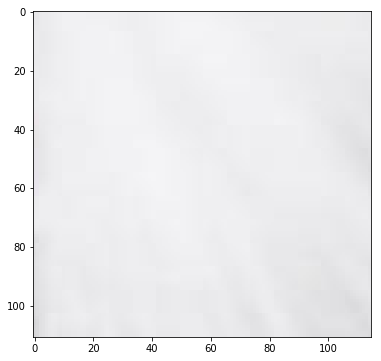

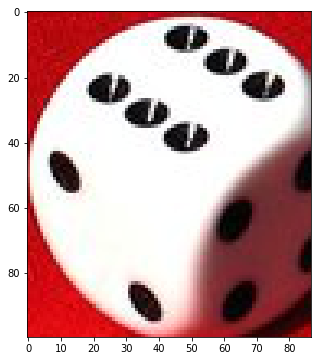

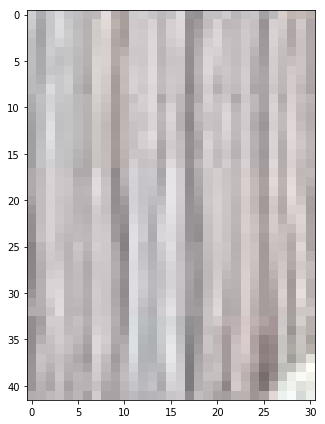

<function __main__.drawDices>

In [11]:
def drawDices(gamma=0.4, sig=2.7, l=91, u=90):  # RECTANGLES
    fig = plt.figure(facecolor="black", figsize=(60, 60))
    i = 1
    for i, image in enumerate(dices):
        try:
            parse_image(gamma, image, l, sig, u)
        except ValueError:
            print("error with {0}".format(i))
    plt.tight_layout()
    plt.show()
    fig.savefig("dices.pdf", facecolor="black")
    plt.close()

interact(drawDices, gamma=(0.1, 2, 0.1), sig=(0.1, 4, 0.1), l=(0, 100, 1), u=(0, 100, 1))
